In [171]:
import blackhc.project.script

In [172]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [173]:
mpl.rcParams["figure.dpi"] = 150
sns.set_style("whitegrid")

In [174]:
sns_palette = sns.color_palette()
sns_palette

[(0.12156862745098039, 0.4666666666666667, 0.7058823529411765),
 (1.0, 0.4980392156862745, 0.054901960784313725),
 (0.17254901960784313, 0.6274509803921569, 0.17254901960784313),
 (0.8392156862745098, 0.15294117647058825, 0.1568627450980392),
 (0.5803921568627451, 0.403921568627451, 0.7411764705882353),
 (0.5490196078431373, 0.33725490196078434, 0.29411764705882354),
 (0.8901960784313725, 0.4666666666666667, 0.7607843137254902),
 (0.4980392156862745, 0.4980392156862745, 0.4980392156862745),
 (0.7372549019607844, 0.7411764705882353, 0.13333333333333333),
 (0.09019607843137255, 0.7450980392156863, 0.8117647058823529)]

In [175]:
def savefig(g, path):
    g.savefig(path, transparent=True, dpi=300, bbox_inches="tight")

In [176]:
df_quantities = pd.read_pickle("computed_quantities_mnist_80.pickle")
df_quantities

,xig_approx_log_det,xig_approx_trace,xig_proxy,xpig_proxy_log_det,xpig_proxy_trace,jxpig_proxy_log_det,jxpig_proxy_trace,bald,epig,average_normalized_score,average_ig_score,average_pig_score
0,0.073518,0.079160,-2630.816885,123.247716,531.319025,5585.296566,1.062638e+07,0.038443,0.002413,467.000000,712.0,-248.666667
1,0.041483,0.042563,-2630.848919,123.307826,534.369649,5585.360472,1.068739e+07,0.052627,0.003168,489.000000,725.0,-238.333333
2,4.672380,1082.447666,-2626.218023,120.141406,484.193765,5576.253764,9.683875e+06,0.617655,0.015370,2404.833333,1746.0,677.666667
3,0.038386,0.039558,-2630.852017,123.330052,536.557832,5585.366829,1.073116e+07,0.166566,0.005634,731.000000,879.0,-142.000000
4,0.004179,0.004194,-2630.886224,123.372711,537.249969,5585.435106,1.074500e+07,0.084353,0.004632,401.750000,684.0,-281.000000
...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.416036,0.648732,-2630.474367,122.675584,513.312366,5584.611673,1.026625e+07,0.260912,0.011145,1355.750000,1097.5,253.000000
996,0.000049,0.000049,-2630.890354,123.379587,537.484056,5585.443377,1.074968e+07,0.011668,0.000957,-310.500000,325.0,-635.333333
997,0.007150,0.007201,-2630.883253,123.367602,536.901617,5585.429184,1.073803e+07,0.046107,0.002762,282.000000,627.0,-347.000000
998,0.033534,0.034610,-2630.856869,123.323768,534.839015,5585.376397,1.069678e+07,0.012868,0.000520,121.250000,565.0,-446.333333


In [177]:
df_quantities_sorted = df_quantities.sort_values(by=["bald"], ascending=False)
df_quantities_sorted = df_quantities_sorted.reset_index(drop=True)
df_quantities_sorted = df_quantities_sorted.reset_index()
df_quantities_sorted = df_quantities_sorted.rename(columns=dict(index="bald_index"))

df_quantities_sorted = df_quantities_sorted.sort_values(by=["epig"], ascending=False)
df_quantities_sorted = df_quantities_sorted.reset_index(drop=True)
df_quantities_sorted = df_quantities_sorted.reset_index()
df_quantities_sorted = df_quantities_sorted.rename(columns=dict(index="epig_index"))

df_quantities_sorted = df_quantities_sorted.sort_values(by=["average_normalized_score"], ascending=False)
df_quantities_sorted = df_quantities_sorted.reset_index(drop=True)
df_quantities_sorted = df_quantities_sorted.reset_index()
df_quantities_sorted = df_quantities_sorted.rename(columns=dict(index="avg_index"))

df_quantities_sorted = df_quantities_sorted.sort_values(by=["average_ig_score"], ascending=False)
df_quantities_sorted = df_quantities_sorted.reset_index(drop=True)
df_quantities_sorted = df_quantities_sorted.reset_index()
df_quantities_sorted = df_quantities_sorted.rename(columns=dict(index="avg_ig_index"))

df_quantities_sorted = df_quantities_sorted.sort_values(by=["average_pig_score"], ascending=False)
df_quantities_sorted = df_quantities_sorted.reset_index(drop=True)
df_quantities_sorted = df_quantities_sorted.reset_index()
df_quantities_sorted = df_quantities_sorted.rename(columns=dict(index="avg_pig_index"))

In [178]:
df_melted = df_quantities_sorted.melt(
    id_vars=["bald_index", "epig_index", "avg_index", "avg_ig_index", "avg_pig_index"]
)
df_melted

,bald_index,epig_index,avg_index,avg_ig_index,avg_pig_index,variable,value
0,4,5,3,27,0,xig_approx_log_det,13.400811
1,9,8,0,7,1,xig_approx_log_det,14.970577
2,2,6,1,6,2,xig_approx_log_det,12.466885
3,17,16,6,16,3,xig_approx_log_det,12.727153
4,1,0,8,28,4,xig_approx_log_det,10.569885
...,...,...,...,...,...,...,...
11995,990,993,995,994,995,average_pig_score,-986.333333
11996,995,995,996,996,996,average_pig_score,-987.666667
11997,997,998,997,997,997,average_pig_score,-993.666667
11998,996,996,998,998,998,average_pig_score,-994.000000


In [179]:
df_melted.variable.unique()

array(['xig_approx_log_det', 'xig_approx_trace', 'xig_proxy',
       'xpig_proxy_log_det', 'xpig_proxy_trace', 'jxpig_proxy_log_det',
       'jxpig_proxy_trace', 'bald', 'epig', 'average_normalized_score',
       'average_ig_score', 'average_pig_score'], dtype=object)

In [180]:
readable_name_map = {
    "xig_approx_log_det": "(E)IG (LogDet)",
    "xig_approx_trace": "(E)IG (Trace)",
    "xig_proxy": "(E)IG (Proxy Log Det)",
    "xpig_proxy_log_det": "(E)PIG (LogDet)",
    "xpig_proxy_trace": "(JE)PIG (Trace)",
    "jxpig_proxy_log_det": "J(E)PIG (LogDet)",
    "jxpig_proxy_trace": "(JE)PIG (Trace)",
    "bald": "BALD (Prediction Space)",
    "epig": "EPIG (Prediction Space)",
}

df_melted["Acquisition Function"] = df_melted["variable"].map(readable_name_map)
df_melted

,bald_index,epig_index,avg_index,avg_ig_index,avg_pig_index,variable,value,Acquisition Function
0,4,5,3,27,0,xig_approx_log_det,13.400811,(E)IG (LogDet)
1,9,8,0,7,1,xig_approx_log_det,14.970577,(E)IG (LogDet)
2,2,6,1,6,2,xig_approx_log_det,12.466885,(E)IG (LogDet)
3,17,16,6,16,3,xig_approx_log_det,12.727153,(E)IG (LogDet)
4,1,0,8,28,4,xig_approx_log_det,10.569885,(E)IG (LogDet)
...,...,...,...,...,...,...,...,...
11995,990,993,995,994,995,average_pig_score,-986.333333,NaN
11996,995,995,996,996,996,average_pig_score,-987.666667,NaN
11997,997,998,997,997,997,average_pig_score,-993.666667,NaN
11998,996,996,998,998,998,average_pig_score,-994.000000,NaN


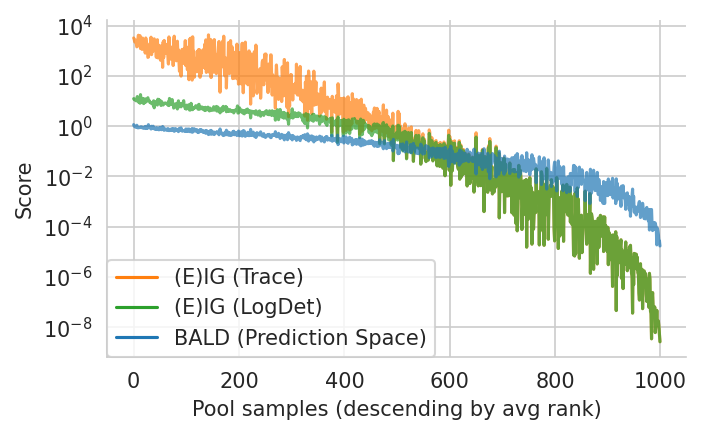

In [181]:
sub_df = df_melted[df_melted.variable.isin(["xig_approx_log_det", "xig_approx_trace", "bald"])]
sub_df = sub_df.copy()
g = sns.relplot(
    data=sub_df,
    kind="line",
    x="avg_ig_index",
    y="value",
    hue="Acquisition Function",
    hue_order=[
        readable_name_map["xig_approx_trace"],
        readable_name_map["xig_approx_log_det"],
        readable_name_map["bald"],
    ],
    palette=[sns_palette[1], sns_palette[2], sns_palette[0]],
    alpha=0.7,
    height=3,
    aspect=1.62,
)
g.ax.set_yscale("log")
g.set_axis_labels("Pool samples (descending by avg rank)", "Score")
g.tight_layout()
# handles, labels = g.ax.get_legend_handles_labels()
# if True:
#     plt.legend(handles[::-1], labels[::-1], loc='lower right', ncol=2)
# else:
#     plt.legend(handles[::-1], labels[::-1], loc='upper right', ncol=2)
plt.legend(loc="lower left", borderaxespad=0)
g._legend.remove()

savefig(g, "bald_eig_log_det_trace_comparison.pdf")
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


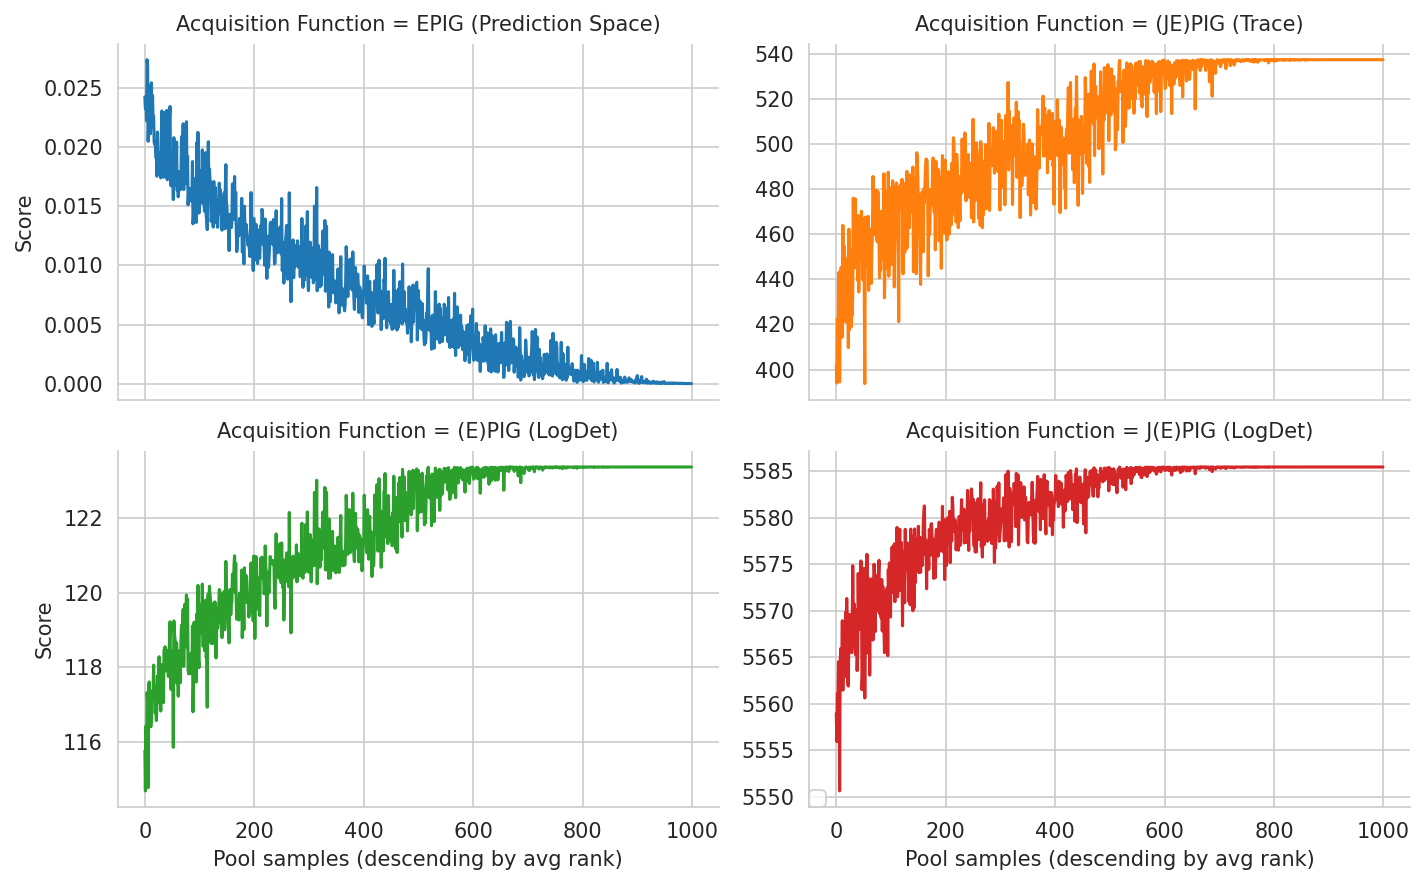

In [182]:
sub_df = df_quantities_sorted.copy()
# sub_df = (sub_df-sub_df.mean())/sub_df.std()
sub_df = sub_df.melt(id_vars=["bald_index", "epig_index", "avg_index", "avg_ig_index", "avg_pig_index"])
sub_df["Acquisition Function"] = sub_df["variable"].map(readable_name_map)
sub_df = sub_df[sub_df.variable.isin(["xpig_proxy_log_det", "jxpig_proxy_log_det", "xpig_proxy_trace", "epig"])]
sub_df


g = sns.relplot(
    kind="line",
    data=sub_df,
    x="avg_pig_index",
    y="value",
    col="Acquisition Function",
    col_order=[
        readable_name_map["epig"],
        readable_name_map["xpig_proxy_trace"],
        readable_name_map["xpig_proxy_log_det"],
        readable_name_map["jxpig_proxy_log_det"],
    ],
    hue="Acquisition Function",
    hue_order=[
        readable_name_map["epig"],
        readable_name_map["xpig_proxy_trace"],
        readable_name_map["xpig_proxy_log_det"],
        readable_name_map["jxpig_proxy_log_det"],
    ],
    # palette=[sns_palette[1],sns_palette[2],sns_palette[0]],
    alpha=1,
    height=3,
    aspect=1.62,
    facet_kws=dict(sharey=False),
    col_wrap=2,
)
# g.set_yscale("log")
g.set_axis_labels("Pool samples (descending by avg rank)", "Score")
g.tight_layout()
# handles, labels = g.ax.get_legend_handles_labels()
# plt.legend(handles[::-1], labels[::-1], loc='lower right', ncol=2)
# else:
#     plt.legend(handles[::-1], labels[::-1], loc='upper right', ncol=2)
plt.legend(loc="lower left", borderaxespad=0, ncol=2)
g._legend.remove()
savefig(g, "epig_log_det_trace_jepig_comparison.pdf")

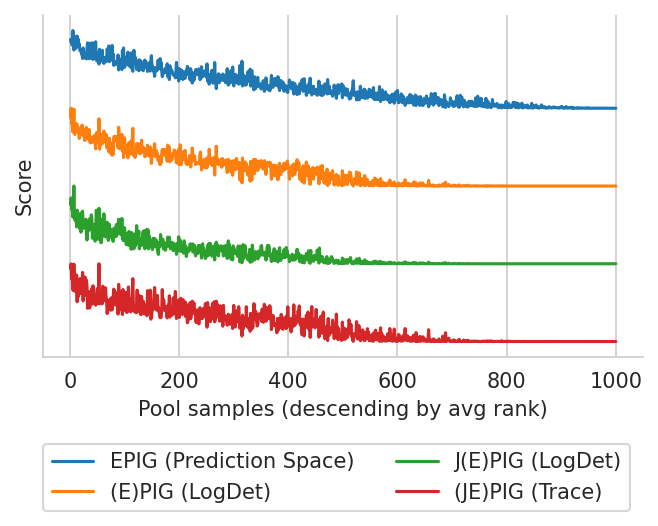

In [183]:
sub_df = df_quantities_sorted.copy()
sub_df["xpig_proxy_log_det"] *= -1
sub_df["jxpig_proxy_log_det"] *= -1
sub_df["xpig_proxy_trace"] *= -1

sub_df = (sub_df - sub_df.min()) / (sub_df.max() - sub_df.min())

sub_df["avg_pig_index"] = sub_df["avg_pig_index"].rank()

sub_df["xpig_proxy_log_det"] -= 1
sub_df["jxpig_proxy_log_det"] -= 2
sub_df["xpig_proxy_trace"] -= 3
sub_df = sub_df.melt(id_vars=["bald_index", "epig_index", "avg_index", "avg_ig_index", "avg_pig_index"])
sub_df["Acquisition Function"] = sub_df["variable"].map(readable_name_map)
sub_df = sub_df[sub_df.variable.isin(["xpig_proxy_log_det", "jxpig_proxy_log_det", "xpig_proxy_trace", "epig"])]
sub_df


g = sns.relplot(
    data=sub_df,
    x="avg_pig_index",
    kind="line",
    y="value",
    hue="Acquisition Function",
    hue_order=[
        readable_name_map["epig"],
        readable_name_map["xpig_proxy_log_det"],
        readable_name_map["jxpig_proxy_log_det"],
        readable_name_map["xpig_proxy_trace"],
    ],
    # palette=[sns_palette[1],sns_palette[2],sns_palette[0]],
    alpha=1,
    height=3,
    aspect=1.62,
)
# g.ax.set_yscale("log")
g.set_axis_labels("Pool samples (descending by avg rank)", "Score")
g.tight_layout()
# handles, labels = g.ax.get_legend_handles_labels()
# if True:
#     plt.legend(handles[::-1], labels[::-1], loc='lower right', ncol=2)
# else:
#     plt.legend(handles[::-1], labels[::-1], loc='upper right', ncol=2)
plt.legend(loc="lower left", bbox_to_anchor=(0, -0.45), borderaxespad=0, ncol=2)
g._legend.remove()
g.ax.set_yticks([])

savefig(g, "epig_log_det_trace_jepig_qualitative_comparison.pdf")

In [184]:
sub_df = df_quantities_sorted.copy()
sub_df = (sub_df - sub_df.mean()) / sub_df.std()
sub_df = sub_df.melt(id_vars=["bald_index", "epig_index", "avg_index", "avg_ig_index", "avg_pig_index"])
sub_df["Acquisition Function"] = sub_df["variable"].map(readable_name_map)
sub_df = sub_df[sub_df.variable.isin(["xpig_proxy_log_det", "xpig_proxy_trace", "epig"])]
sub_df

,bald_index,epig_index,avg_index,avg_ig_index,avg_pig_index,variable,value,Acquisition Function
3000,-1.715605,-1.712142,-1.719067,-1.635970,-1.729454,xpig_proxy_log_det,-3.193402,(E)PIG (LogDet)
3001,-1.698293,-1.701755,-1.729454,-1.705218,-1.725992,xpig_proxy_log_det,-3.763186,(E)PIG (LogDet)
3002,-1.722530,-1.708680,-1.725992,-1.708680,-1.722530,xpig_proxy_log_det,-2.841184,(E)PIG (LogDet)
3003,-1.670594,-1.674056,-1.708680,-1.674056,-1.719067,xpig_proxy_log_det,-3.674591,(E)PIG (LogDet)
3004,-1.725992,-1.729454,-1.701755,-1.632508,-1.715605,xpig_proxy_log_det,-2.363419,(E)PIG (LogDet)
...,...,...,...,...,...,...,...,...
8995,1.698293,1.708680,1.715605,1.712142,1.715605,epig,-1.108016,EPIG (Prediction Space)
8996,1.715605,1.715605,1.719067,1.719067,1.719067,epig,-1.108314,EPIG (Prediction Space)
8997,1.722530,1.725992,1.722530,1.722530,1.722530,epig,-1.108538,EPIG (Prediction Space)
8998,1.719067,1.719067,1.725992,1.725992,1.725992,epig,-1.108439,EPIG (Prediction Space)


## Spearman Rank Correlation Coefficients

In [185]:
def topk_spearman_rank(k, print_overlap=False):
    def func(s1, s2):
        df = pd.DataFrame.from_dict(dict(s1=s1, s2=s2))
        df_rank = df.rank()
        df_rank_topk = df_rank[(df_rank.s1 <= k) | (df_rank.s2 <= k)]
        if print_overlap:
            print(len(df_rank_topk) / k)
        corr = df_rank_topk.corr(method="spearman")["s1"]["s2"]
        return corr

    return func


df = df_quantities.copy()
df["xpig_proxy_log_det"] *= -1
df["xpig_proxy_trace"] *= -1
df["jxpig_proxy_log_det"] *= -1
df["jxpig_proxy_trace"] *= -1
top50_srcc_df = df.corr(method=topk_spearman_rank(500))
top50_srcc_df

,xig_approx_log_det,xig_approx_trace,xig_proxy,xpig_proxy_log_det,xpig_proxy_trace,jxpig_proxy_log_det,jxpig_proxy_trace,bald,epig,average_normalized_score,average_ig_score,average_pig_score
xig_approx_log_det,1.000000,0.999978,1.000000,0.999818,0.995135,0.999992,0.995135,0.799549,0.746190,0.933326,0.943701,0.920667
xig_approx_trace,0.999978,1.000000,0.999978,0.999823,0.995141,0.999971,0.995141,0.801042,0.747559,0.933736,0.944074,0.921125
xig_proxy,1.000000,0.999978,1.000000,0.999818,0.995135,0.999992,0.995135,0.799549,0.746190,0.933326,0.943701,0.920667
xpig_proxy_log_det,0.999818,0.999823,0.999818,1.000000,0.996181,0.999809,0.996181,0.800099,0.747195,0.933984,0.944231,0.921652
xpig_proxy_trace,0.995135,0.995141,0.995135,0.996181,1.000000,0.995099,1.000000,0.800105,0.746708,0.932542,0.941346,0.921572
jxpig_proxy_log_det,0.999992,0.999971,0.999992,0.999809,0.995099,1.000000,0.995099,0.799681,0.746312,0.933398,0.943773,0.920738
jxpig_proxy_trace,0.995135,0.995141,0.995135,0.996181,1.000000,0.995099,1.000000,0.800105,0.746708,0.932542,0.941346,0.921572
bald,0.799549,0.801042,0.799549,0.800099,0.800105,0.799681,0.800105,1.000000,0.976324,0.951640,0.943911,0.955398
epig,0.746190,0.747559,0.746190,0.747195,0.746708,0.746312,0.746708,0.976324,1.000000,0.914899,0.898736,0.928068
average_normalized_score,0.933326,0.933736,0.933326,0.933984,0.932542,0.933398,0.932542,0.951640,0.914899,1.000000,0.997769,0.997710


In [155]:
sub_df = top50_srcc_df[
    [
        "bald",
        "xig_approx_log_det",
        "xig_approx_trace",
        "epig",
        "xpig_proxy_log_det",
        "jxpig_proxy_log_det",
        "jxpig_proxy_trace",
    ]
].loc[["bald", "epig"]]
sub_df=sub_df.rename(columns=readable_name_map, index=readable_name_map)

In [156]:
print(sub_df.to_latex(float_format="%.3f"))

\begin{tabular}{lrrrrrrr}
\toprule
{} &  BALD (Prediction Space) &  (E)IG (LogDet) &  (E)IG (Trace) &  EPIG (Prediction Space) &  (E)PIG (LogDet) &  J(E)PIG (LogDet) &  (JE)PIG (Trace) \\
\midrule
BALD (Prediction Space) &                    1.000 &           0.800 &          0.801 &                    0.976 &            0.800 &             0.800 &            0.800 \\
EPIG (Prediction Space) &                    0.976 &           0.746 &          0.748 &                    1.000 &            0.747 &             0.746 &            0.747 \\
\bottomrule
\end{tabular}



/tmp/ipykernel_77749/3209493847.py:1: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  print(sub_df.to_latex(float_format="%.3f"))


In [159]:
df = df_quantities.copy()
df["xpig_proxy_log_det"] *= -1
df["xpig_proxy_trace"] *= -1
df["jxpig_proxy_log_det"] *= -1
df["jxpig_proxy_trace"] *= -1
df = df.corr(method="spearman")
sub_df = df[
    [
        "bald",
        "xig_approx_log_det",
        "xig_approx_trace",
        "epig",
        "xpig_proxy_log_det",
        "jxpig_proxy_log_det",
        "jxpig_proxy_trace",
    ]
].loc[["bald", "epig"]]
sub_df = sub_df.rename(columns=readable_name_map, index=readable_name_map)
sub_df

,BALD (Prediction Space),(E)IG (LogDet),(E)IG (Trace),EPIG (Prediction Space),(E)PIG (LogDet),J(E)PIG (LogDet),(JE)PIG (Trace)
BALD (Prediction Space),1.000000,0.95512,0.939559,0.983865,0.947928,0.955134,0.927000
EPIG (Prediction Space),0.983865,0.91753,0.896523,1.000000,0.918178,0.917681,0.903336


In [160]:
print(sub_df.to_latex(float_format="%.3f"))

\begin{tabular}{lrrrrrrr}
\toprule
{} &  BALD (Prediction Space) &  (E)IG (LogDet) &  (E)IG (Trace) &  EPIG (Prediction Space) &  (E)PIG (LogDet) &  J(E)PIG (LogDet) &  (JE)PIG (Trace) \\
\midrule
BALD (Prediction Space) &                    1.000 &           0.955 &          0.940 &                    0.984 &            0.948 &             0.955 &            0.927 \\
EPIG (Prediction Space) &                    0.984 &           0.918 &          0.897 &                    1.000 &            0.918 &             0.918 &            0.903 \\
\bottomrule
\end{tabular}



/tmp/ipykernel_77749/3209493847.py:1: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  print(sub_df.to_latex(float_format="%.3f"))


In [ ]:
sub_df.to_latex